In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

sns.set()

In [74]:
class LogisticRegression:
    def __init__(self, tol=0.0001, C=1.0, fit_intercept=True, max_iter=100, random_state=None):
        self.tol = tol
        self.C = C
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        
        if random_state is None:
            random_state = 42
        self.rng = np.random.RandomState(random_state)
        
    def _add_intercept(self, X):
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
        
    def _sigmoid(self, z):
        """
        Function returns sigmoid function. More about sigmoid function 
        you can check here https://en.wikipedia.org/wiki/Sigmoid_function.
        """
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        return -y * np.log(h) - (1 - y) * np.log(1-h)
    
    def _gradient(self, X, y, weights):
        z = np.dot(X, weights)
        h = self._sigmoid(z)
        errors = h - y
        grad = np.dot(X.T, errors) / X.shape[0]
        reg_term = self.C * weights / X.shape[0]
        weights -= self.tol * (grad + reg_term)
        return weights

    def fit(self, X, y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        weights = np.zeros(X.shape[1])
        for _ in range(self.max_iter):
            self.weights = self._gradient(X, y, weights)
        
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        z = np.dot(X, self.weights)
        return self._sigmoid(z)
    
    def predict(self, X):
        result = self.predict_proba(X)
        return result >= 0.5

In [75]:
data, target = make_blobs(centers=2, random_state=42)

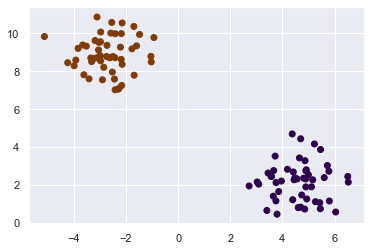

In [76]:
plt.scatter(data[:,0], data[:,1], c=target, cmap='PuOr')

In [83]:
log_reg = LogisticRegression()
log_reg.fit(data, target)
y_pred = log_reg.predict(data)